# Imports

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Function Definition

Eucledian Distance

In [ ]:
def euclideanDist(p, q):
  x1 = p[0]
  y1 = p[1]
  x2 = q[0]
  y2 = q[1]
  return round(math.sqrt((x1 - x2)**2 + (y1 - y2)**2), 2)

Plot KNN Graph

In [ ]:
def plot_knn(classes, weights, heights, title):
  x1 = []
  y1 = []
  x2 = []
  y2 = []
  for i in range(0, len(classes)):
    if classes[i] == 1:
      x1.append(weights[i])
      y1.append(heights[i])
    else:
      x2.append(weights[i])
      y2.append(heights[i])

  plt.scatter(x1, y1, c = 'blue', marker = 'o')
  plt.scatter(x2, y2, c = 'red', marker = 'x')
  plt.title(title)
  plt.legend(['Normal', 'Underweight'])
  plt.xlabel('Weights')
  plt.ylabel('Heights')

Accuracy Calculation

In [ ]:
def accuracy(result, origin):
  print('Result:  ', result)
  print('Original:', origin)
  matched = 0
  non_matched = 0
  for i in range(0, len(result)):
    if result[i] == origin[i]:
      matched = matched + 1
    else:
      non_matched = non_matched + 1
  acc = (matched / (matched + non_matched)) * 100
  print('Accuracy: ', acc, '%')

# Input Data

In [ ]:
n = 25
weights = [51, 62, 69, 64, 65, 56, 58, 57, 55, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 53, 54, 55, 60, 51, 52]
heights = [167, 182, 176, 173, 172, 174, 169, 173, 170, 180, 179, 178, 177, 176, 175, 176, 174, 172, 171, 173, 174, 175, 170, 171, 172]
classes = [0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1] # 0 = Underweight, 1 = Normal

Dataframe Definition

In [ ]:
df = pd.DataFrame(list(zip(weights, heights, classes)), columns = ['Weight', 'Height', 'Class'])
copied_df = df.copy() # copied dataframe for accuracy calculation
percentage = 60 # percentage of training data
k = 5 # no of neighbors
df

,Weight,Height,Class
0,51,167,0
1,62,182,1
2,69,176,1
3,64,173,0
4,65,172,1
5,56,174,0
6,58,169,1
7,57,173,1
8,55,170,1
9,50,180,0


# KNN Classifier

Training & Testing Data

In [ ]:
l = math.ceil(n * (percentage / 100)) # no of training data 
t = n - l # no of testing data
m = len(df) - t # test data start index
unknown = df.iloc[l:, 0:2].values.tolist() # test data list
print(unknown)

[[56, 176], [57, 174], [58, 172], [59, 171], [53, 173], [54, 174], [55, 175], [60, 170], [51, 171], [52, 172]]


Training

In [ ]:
for j in range(0, len(unknown)): # testing data

  # Calculate euclidean distance
  dist = []
  for i in range(0, m): # training data
    p = df.iloc[i]
    dist.append([i, euclideanDist(unknown[j], p)]) # index, distance

  # Sort distances
  dist.sort(key= lambda a: a[1]) # sort list by distance

  # Classification
  c1 = 0 # no of nearest neighbors of first class
  c2 = 0 # no of nearest neighbors of second class

  for i in range(0, k): # takes k nearest neighbors under consideration
    if df.iloc[dist[i][0]][2] == 1: # if first class's point is closest
      c1 = c1 + 1
    else:
      c2 = c2 + 1
  print('c1: ', c1, 'c2: ',c2)

  if c1 > c2:
    df.iloc[l][2] = 1 # assigned as class 1
    l = l + 1
  else:
    df.iloc[l][2] = 0 # assigned as class 2
    l = l + 1

c1:  2 c2:  3
c1:  2 c2:  3
c1:  3 c2:  2
c1:  3 c2:  2
c1:  2 c2:  3
c1:  2 c2:  3
c1:  2 c2:  3
c1:  4 c2:  1
c1:  1 c2:  4
c1:  1 c2:  4


In [ ]:
df[m:]

,Weight,Height,Class
15,56,176,0
16,57,174,0
17,58,172,1
18,59,171,1
19,53,173,0
20,54,174,0
21,55,175,0
22,60,170,1
23,51,171,0
24,52,172,0


In [ ]:
copied_df[m:]

,Weight,Height,Class
15,56,176,0
16,57,174,1
17,58,172,1
18,59,171,1
19,53,173,0
20,54,174,1
21,55,175,0
22,60,170,1
23,51,171,0
24,52,172,1


# Testing

In [ ]:
result = df.iloc[m:, 2].values.tolist()
origin = copied_df.iloc[m:, 2].values.tolist()
accuracy(result, origin)

Result:   [0, 0, 1, 1, 0, 0, 0, 1, 0, 0]
Original: [0, 1, 1, 1, 0, 1, 0, 1, 0, 1]
Accuracy:  70.0 %


# Plotting

Desired

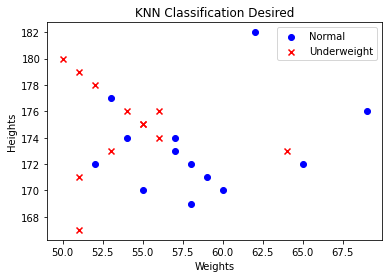

In [ ]:
plot_knn(classes, weights, heights, 'KNN Classification Desired')

Actual

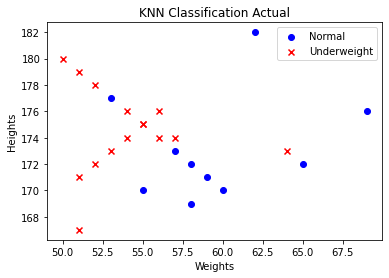

In [ ]:
updated = df.loc[:, 'Class'].values.tolist()
plot_knn(updated, weights, heights, 'KNN Classification Actual')

# Built in KNN

In [ ]:
X_train = copied_df.loc[:m - 1, ['Weight', 'Height']]
X_test = copied_df.loc[m:, ['Weight', 'Height']]
y_train = copied_df.loc[:m - 1, 'Class']
y_test = copied_df.loc[m:, 'Class']

knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

# Predict on dataset which model has not seen before
y_test = knn.predict(X_test)

In [ ]:
built_updated = copied_df.loc[:m - 1, 'Class'].values.tolist()
built_updated = built_updated + list(y_test)

Accuracy

In [ ]:
accuracy(list(y_test), origin)

Result:   [0, 0, 1, 1, 0, 0, 0, 1, 0, 0]
Original: [0, 1, 1, 1, 0, 1, 0, 1, 0, 1]
Accuracy:  70.0 %


Desired

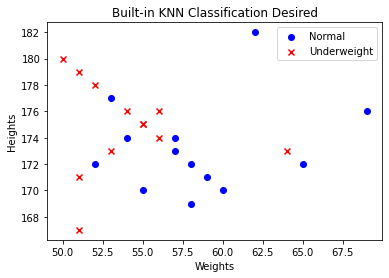

In [ ]:
plot_knn(classes, weights, heights, 'Built-in KNN Classification Desired')

Actual

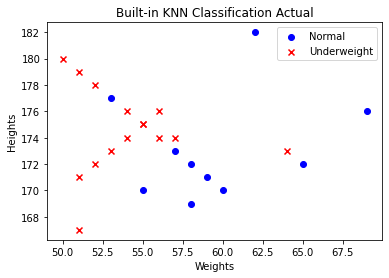

In [ ]:
plot_knn(built_updated, weights, heights, 'Built-in KNN Classification Actual')